In [1]:
# import os + os.chir is used to get to the llms directory to use the usermodules 
import os
os.chdir('C:/Users/AViey/OneDrive/Documents/College/UCI/Stats/stats170a/copilot/copilot/llms/user_modules') 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from  db import Session, get_training_data, get_model_sentiment_data, add_sentiment_evaluation_data
from table_instances import SentimentEvaluation
import pandas as pd
from sklearn.metrics import accuracy_score

session = Session()

Gather Data from different models plus the training data

In [2]:
train_df = get_training_data()
train_df.head()

,dialogue_id,dataset,dialogue_text,actual_summary,actual_sentiment
0,3816,training,"#Person1#: Good morning, sir. Is there anythin...",#Person2# wants a suit made in 100 % black Bar...,neutral
1,3,training,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,positive
2,4,training,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,negative
3,5,training,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,positive
4,6,training,"#Person1#: Happy birthday, Aims!\n#Person2#: T...",Lisa gives Aims a birthday present and Aims lo...,positive


Mistral Sentiment

In [3]:
mistral_sentiment = get_model_sentiment_data('mistral 7b')
mistral_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,1,1,mistral 7b,neutral,None,None
1,2,2,mistral 7b,neutral,None,None
2,3,3,mistral 7b,positive,None,None
3,4,4,mistral 7b,negative,None,None
4,5,5,mistral 7b,positive,None,None


Gemma Sentiment

In [4]:
gemma_sentiment = get_model_sentiment_data("gemma 7b")
gemma_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,12428,3816,gemma 7b,positive,32950.429688,0.743105
1,12429,3,gemma 7b,positive,33164.658691,0.858522
2,12430,4,gemma 7b,neutral,33163.166504,0.802573
3,12431,5,gemma 7b,positive,33124.416504,0.993101
4,12432,6,gemma 7b,positive,32954.593750,1.409419


Llama 3 sentiment

In [5]:
llama3_sentiment = get_model_sentiment_data('llama 3 8b')
llama3_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,25855,3816,llama 3 8b,positive,31030.074219,3.045265
1,25856,3,llama 3 8b,positive,31099.045410,2.877197
2,25857,4,llama 3 8b,neutral,31097.461426,2.877703
3,25858,5,llama 3 8b,positive,31085.316406,2.831945
4,25859,6,llama 3 8b,positive,31031.229492,2.781226


Falcon Sentiment

In [6]:
falcon_sentiment = get_model_sentiment_data('falcon 7b')
falcon_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,38282,3816,falcon 7b,positive,26544.150391,0.616156
1,38283,3,falcon 7b,positive,26566.411621,0.252410
2,38284,4,falcon 7b,positive,26565.179688,0.284257
3,38285,5,falcon 7b,positive,26562.931641,0.251904
4,38286,6,falcon 7b,positive,26546.044922,0.220447


Compute confusion matrix for mistral

In [7]:
conf_mat_mistral = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        mistral_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_mistral.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


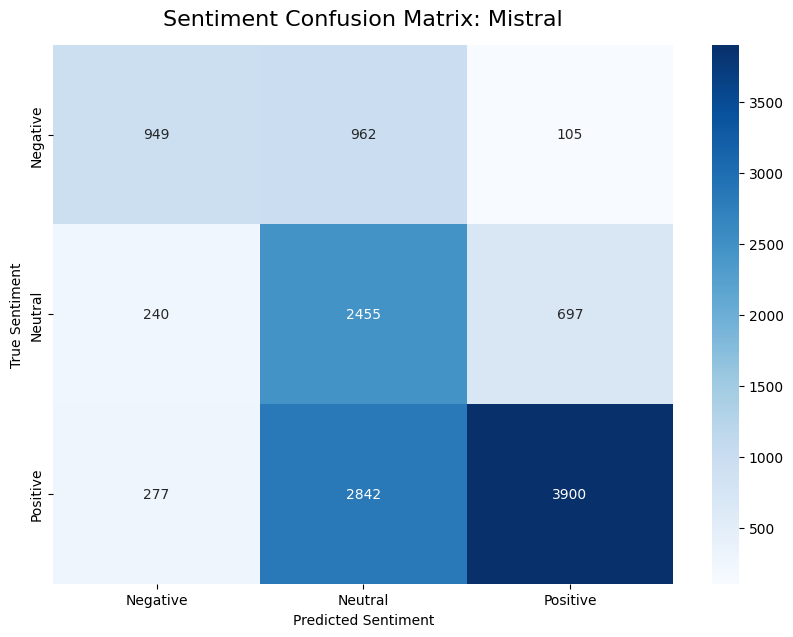

In [8]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix1 = confusion_matrix(conf_mat_mistral['actual_sentiment'], conf_mat_mistral['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Mistral', fontsize=16, pad=14)
plt.show()

Mistral accuracy score

In [9]:
accuracy_mistral = accuracy_score(conf_mat_mistral["actual_sentiment"], conf_mat_mistral["generated_sentiment"])
print(f"Overall accuracy: {accuracy_mistral:.2f}")

Overall accuracy: 0.59


Compute confusion matrix for gemma

In [10]:
conf_mat_gemma = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        gemma_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_gemma.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,neutral
3,5,positive,positive
4,6,positive,positive


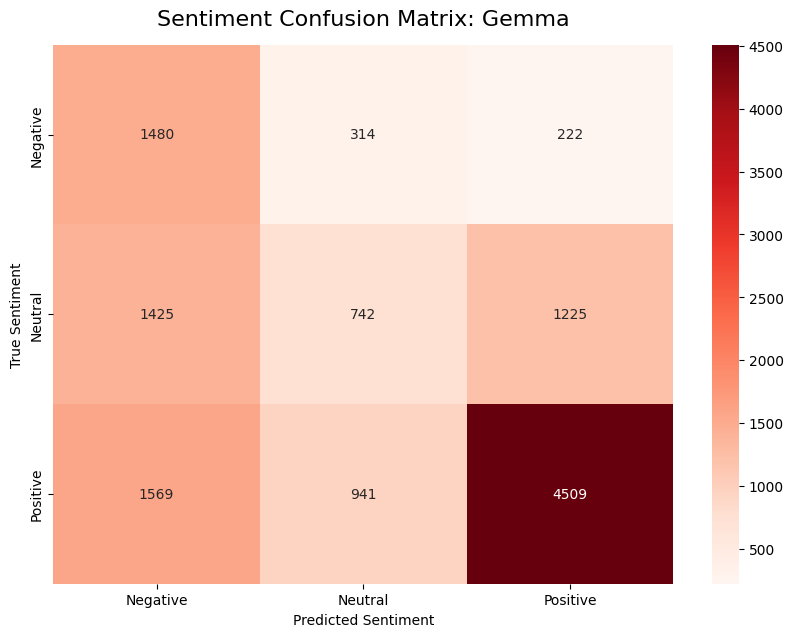

In [11]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix2 = confusion_matrix(conf_mat_gemma['actual_sentiment'], conf_mat_gemma['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap="Reds",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Gemma', fontsize=16, pad=14)
plt.show()

In [12]:
accuracy_gemma = accuracy_score(conf_mat_gemma["actual_sentiment"], conf_mat_gemma["generated_sentiment"])
print(f"Overall accuracy: {accuracy_gemma:.2f}")

Overall accuracy: 0.54


Compute Confusion Matrix for LLama 3

In [13]:
conf_mat_llama3 = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        llama3_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_llama3.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,neutral
3,5,positive,positive
4,6,positive,positive


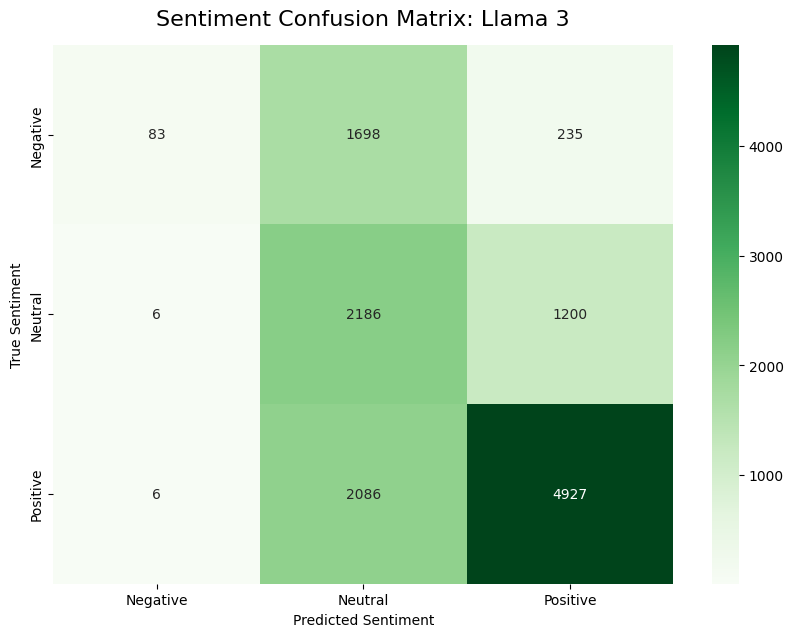

In [14]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix3 = confusion_matrix(conf_mat_llama3['actual_sentiment'], conf_mat_llama3['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Llama 3', fontsize=16, pad=14)
plt.show()

In [15]:
accuracy_llama3 = accuracy_score(conf_mat_llama3["actual_sentiment"], conf_mat_llama3["generated_sentiment"])
print(f"Overall accuracy: {accuracy_llama3:.2f}")

Overall accuracy: 0.58


In [16]:
from sklearn.metrics import f1_score

# Calculate F1 score
llama3_f1 = f1_score(conf_mat_llama3["actual_sentiment"], conf_mat_llama3["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {llama3_f1:.3f}")

Falcon F1 Score: 0.556


Falcon: Confusion Matrix & Acc. Score

In [17]:
conf_mat_falcon = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        falcon_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_falcon.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,positive
3,5,positive,positive
4,6,positive,positive


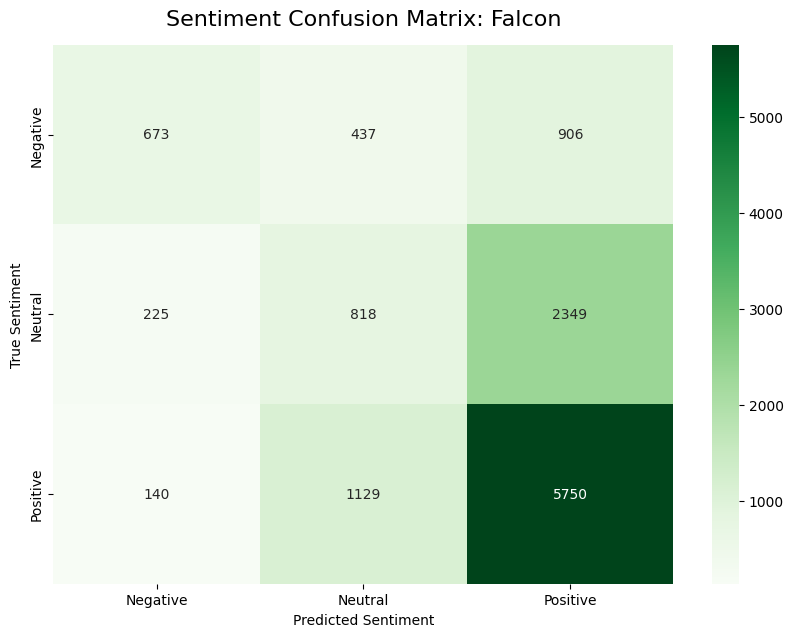

In [18]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix4 = confusion_matrix(conf_mat_falcon['actual_sentiment'], conf_mat_falcon['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Falcon', fontsize=16, pad=14)
plt.show()

In [19]:
accuracy_falcon = accuracy_score(conf_mat_falcon["actual_sentiment"], conf_mat_falcon["generated_sentiment"])
print(f"Overall accuracy: {accuracy_falcon:.3f}")

Overall accuracy: 0.583


In [20]:
from sklearn.metrics import f1_score

# Calculate F1 score
falcon_f1 = f1_score(conf_mat_falcon["actual_sentiment"], conf_mat_falcon["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {falcon_f1:.3f}")

Falcon F1 Score: 0.554


DeciLM 7b Confusion Matrix and Accuracy

In [21]:
deci_sentiment = get_model_sentiment_data('deciLM 7b')
deci_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,50709,3816,deciLM 7b,positive,27177.072266,0.348379
1,50710,3,deciLM 7b,positive,27200.726074,0.281281
2,50711,4,deciLM 7b,negative,27200.142090,0.280755
3,50712,5,deciLM 7b,positive,27197.362793,0.283687
4,50713,6,deciLM 7b,positive,27177.364258,0.213981


In [22]:
conf_mat_deci = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        deci_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_deci.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


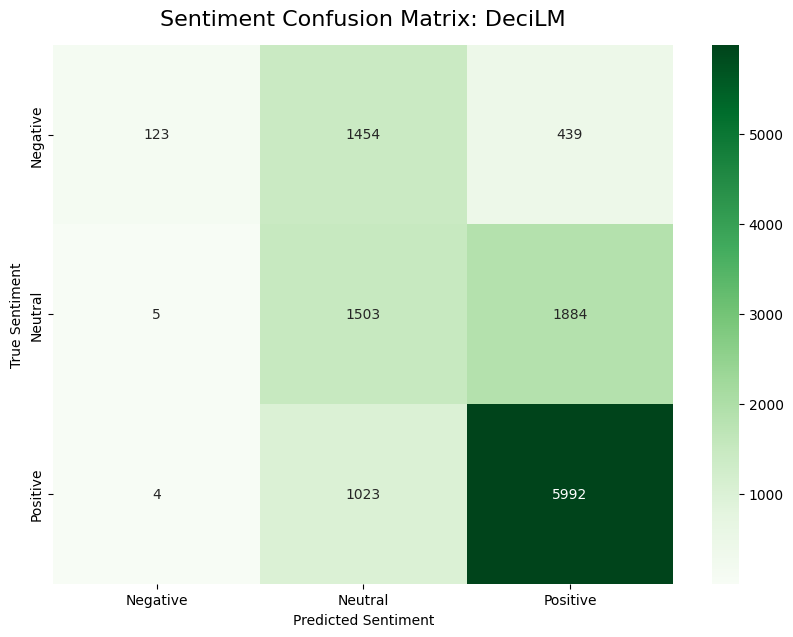

In [23]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix5 = confusion_matrix(conf_mat_deci['actual_sentiment'], conf_mat_deci['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: DeciLM', fontsize=16, pad=14)
plt.show()

In [24]:
accuracy_deci = accuracy_score(conf_mat_deci["actual_sentiment"], conf_mat_deci["generated_sentiment"])
print(f"Overall accuracy: {accuracy_deci:.3f}")

Overall accuracy: 0.613


In [25]:
from sklearn.metrics import f1_score

# Calculate F1 score
deci_f1 = f1_score(conf_mat_deci["actual_sentiment"], conf_mat_deci["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {deci_f1:.3f}")

Falcon F1 Score: 0.571


Orca 2 7b Confusion Matrix & Accuracy

In [26]:
orca_sentiment = get_model_sentiment_data('orca2 7b')
orca_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,63136,3816,orca2 7b,positive,26041.963379,0.353360
1,63137,3,orca2 7b,positive,26204.654785,0.270215
2,63138,4,orca2 7b,negative,26202.532715,0.269059
3,63139,5,orca2 7b,positive,26185.696777,0.270434
4,63140,6,orca2 7b,positive,26041.932129,0.200529


In [27]:
conf_mat_orca = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        orca_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_orca.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


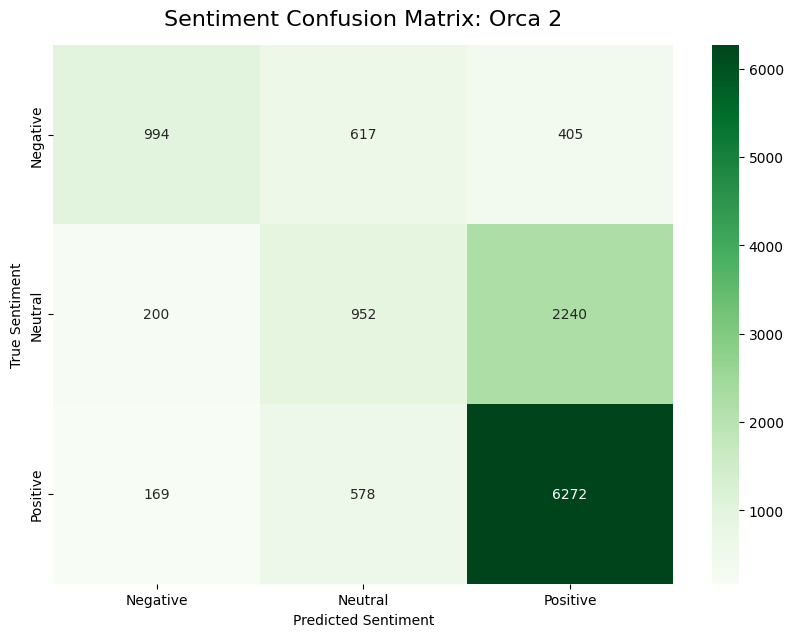

In [28]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix6 = confusion_matrix(conf_mat_orca['actual_sentiment'], conf_mat_orca['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Orca 2', fontsize=16, pad=14)
plt.show()

In [29]:
accuracy_orca = accuracy_score(conf_mat_orca["actual_sentiment"], conf_mat_orca["generated_sentiment"])
print(f"Overall accuracy: {accuracy_orca:.3f}")

Overall accuracy: 0.661


In [30]:
from sklearn.metrics import f1_score

# Calculate F1 score
orca_f1 = f1_score(conf_mat_orca["actual_sentiment"], conf_mat_orca["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {orca_f1:.3f}")

Falcon F1 Score: 0.634


Zephyr Beta 7b Confusion Matrix & Accuracy Score

In [31]:
zephyr_sentiment = get_model_sentiment_data('zephyr 7b beta')
zephyr_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,75563,3816,zephyr 7b beta,neutral,28788.885254,3.004152
1,75564,3,zephyr 7b beta,positive,28837.659180,2.741891
2,75565,4,zephyr 7b beta,negative,28837.631836,2.740753
3,75566,5,zephyr 7b beta,positive,28829.103027,2.737047
4,75567,6,zephyr 7b beta,positive,28790.416504,2.624653


In [32]:
conf_mat_zephyr = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        zephyr_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_zephyr.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,neutral
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


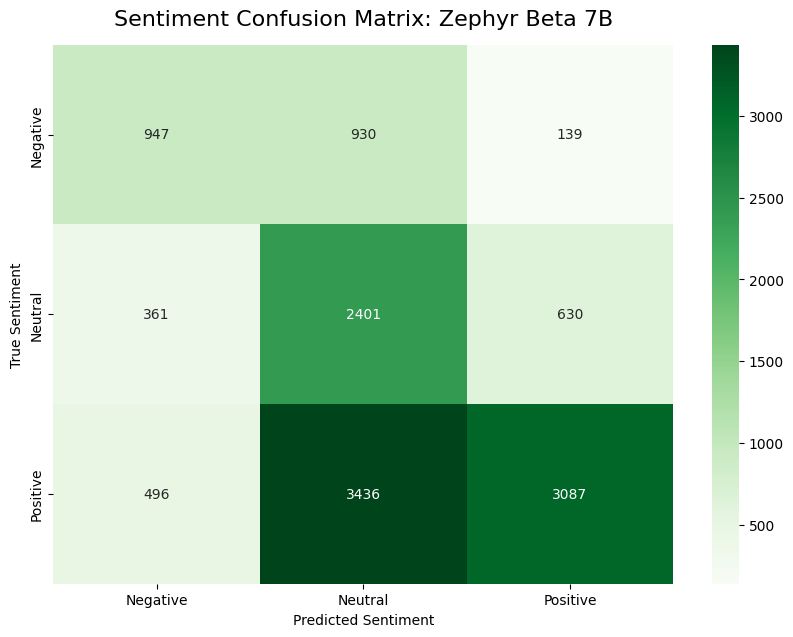

In [33]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix7 = confusion_matrix(conf_mat_zephyr['actual_sentiment'], conf_mat_zephyr['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Zephyr Beta 7B', fontsize=16, pad=14)
plt.show()

In [34]:
accuracy_zephyr = accuracy_score(conf_mat_zephyr["actual_sentiment"], conf_mat_zephyr["generated_sentiment"])
print(f"Overall accuracy: {accuracy_zephyr:.3f}")

Overall accuracy: 0.518


In [35]:
from sklearn.metrics import f1_score

# Calculate F1 score
zephyr_f1 = f1_score(conf_mat_zephyr["actual_sentiment"], conf_mat_zephyr["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {zephyr_f1:.3f}")

Falcon F1 Score: 0.530


Bar charts & Comparisons 

In [36]:
bar_df = pd.DataFrame({'Mistral': [accuracy_mistral], 'Gemma': [accuracy_gemma], 'Llama 3':[accuracy_llama3], 'Falcon':[accuracy_falcon], 'DeciLM':[accuracy_deci], 'Orca 2':[accuracy_orca], 'Zephyr Beta':[accuracy_zephyr]})
bar_df = bar_df.melt(var_name='LLM Model', value_name='Accuracy Score')
bar_df = bar_df.sort_values('Accuracy Score', ascending=True)
bar_df.head()

,LLM Model,Accuracy Score
6,Zephyr Beta,0.517824
1,Gemma,0.541643
2,Llama 3,0.579062
3,Falcon,0.582683
0,Mistral,0.587752


C:\Users\AViey\AppData\Local\Temp\ipykernel_7076\2281270258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


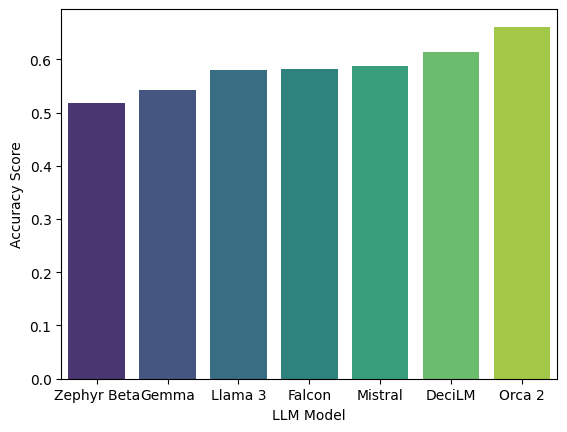

In [37]:
colors = {'Mistral': 'blue', 'Gemma': 'green', 'Llama 3': 'red', 'Falcon':'yellow', 'DeciLM':'purple', 'Orca 2':'orange', 'Zephyr Beta': 'grey'}
sns.barplot(
    x = "LLM Model",
    y = "Accuracy Score",
    data = bar_df,
    palette='viridis'
)

plt.show()

In [38]:
bar_df2 = pd.DataFrame({'Gemma': [sum(gemma_sentiment['time_sentiment_taken']) / 12427], 'Llama 3':[sum(llama3_sentiment["time_sentiment_taken"]) / 12427],  'Falcon':[sum(falcon_sentiment["time_sentiment_taken"]) / 12427],
                        'DeciLM':[sum(deci_sentiment['time_sentiment_taken']) / 12427], 'Orca 2':[sum(orca_sentiment['time_sentiment_taken']) / 12427], 'Zephyr Beta':[sum(zephyr_sentiment["time_sentiment_taken"]) / 12427]})
bar_df2 = bar_df2.melt(var_name='LLM Model', value_name='Time Taken Per Row')
bar_df2 = bar_df2.sort_values('Time Taken Per Row', ascending=True)
bar_df2.head()

,LLM Model,Time Taken Per Row
2,Falcon,0.302629
4,Orca 2,0.314167
3,DeciLM,0.326180
0,Gemma,1.086109
5,Zephyr Beta,2.731799


C:\Users\AViey\AppData\Local\Temp\ipykernel_7076\3802308415.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


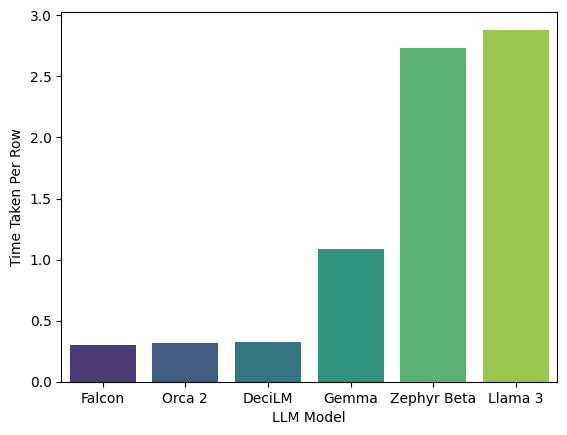

In [39]:
sns.barplot(
    x = "LLM Model",
    y = "Time Taken Per Row",
    data = bar_df2,
    palette='viridis'
)

plt.show()

In [281]:
data_sentiment = pd.DataFrame({
    'Mistral': mistral_sentiment["generated_sentiment"].value_counts(), 
    'Gemma': gemma_sentiment["generated_sentiment"].value_counts(), 
    'Llama3': llama3_sentiment["generated_sentiment"].value_counts(),
    'Falcon': falcon_sentiment["generated_sentiment"].value_counts(),
    'DeciLM':deci_sentiment["generated_sentiment"].value_counts(),
    'Orca 2': orca_sentiment["generated_sentiment"].value_counts(),
    'Zephyr Beta':zephyr_sentiment["generated_sentiment"].value_counts()
    })

all_categories = ['positive', 'negative', 'neutral']  # add other categories as necessary
df_sentiment = pd.DataFrame(data_sentiment, index=all_categories)

df_sentiment.index.name = 'Sentiment'
df_sentiment.columns.name = 'Models'
df_sentiment.head()

Models,Mistral,Gemma,Llama3,Falcon,DeciLM,Orca 2,Zephyr Beta
Sentiment,,,,,,,
positive,4702,5956,6362,9005,8315,8917,3856
negative,1466,4474,95,1038,132,1363,1804
neutral,6259,1997,5970,2384,3980,2147,6767


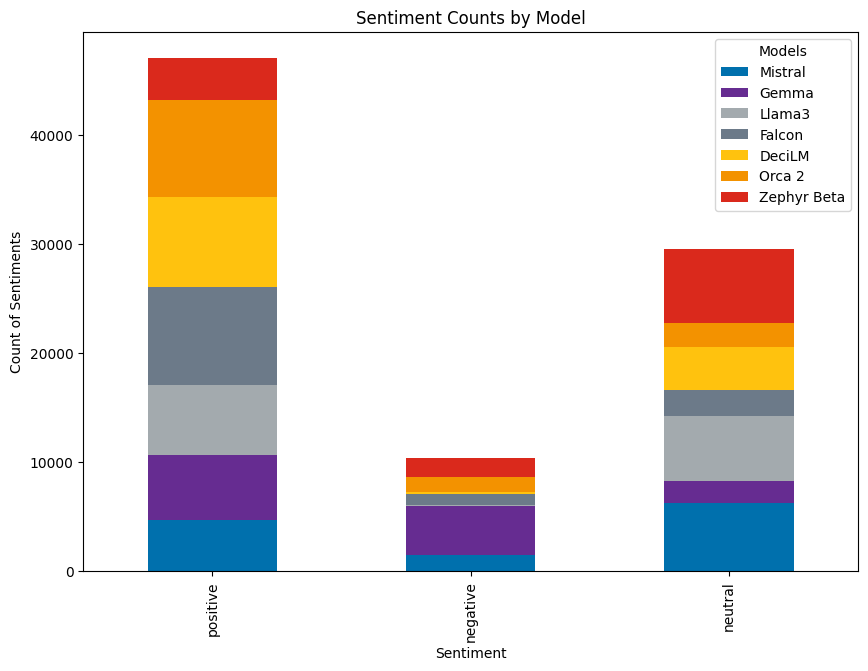

In [90]:
accenture_palette = ["#0070AD", "#662C91", "#A3AAAE", "#6C7A89", "#FFC20E", "#F39200", "#DA291C"]
ax = df_sentiment.plot(kind='bar', stacked=True, figsize=(10, 7), color = accenture_palette)
ax.set_ylabel('Count of Sentiments')
ax.set_title('Sentiment Counts by Model')
plt.legend(title='Models')
plt.show()

In [282]:
bar_data = df_sentiment.reset_index().melt(id_vars=['Sentiment'], var_name='Models', value_name='Total Classified')
bar_data = bar_data.sort_values(by='Total Classified')
bar_data = bar_data.sort_values(by='Sentiment')
bar_data = bar_data.sort_values(by='Models')
bar_data.head()

,Sentiment,Models,Total Classified
14,neutral,DeciLM,3980
13,negative,DeciLM,132
12,positive,DeciLM,8315
11,neutral,Falcon,2384
9,positive,Falcon,9005


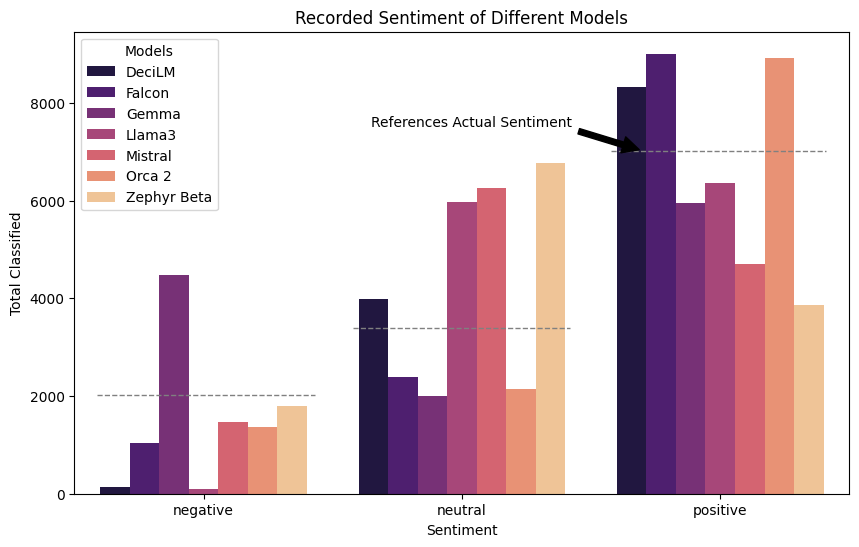

In [314]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=bar_data, x='Sentiment', y='Total Classified', 
            hue='Models', order=['negative', 'neutral', 'positive'], palette='magma')

line_length = [(.31, .0296), (.64, .36), (.97, .693)]
for val in train_df["actual_sentiment"].value_counts():
    lmax, lmin = line_length.pop()
    plt.axhline(y=val, color='grey', linestyle='dashed', linewidth=1, xmax=lmax,xmin= lmin)

plt.annotate(
    f'References Real Sentiment',
    xy=(1.7, 7019),
    xytext=(0.6 + 0.05, 7019 + 500),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10, color='black'
    )

plt.title("Recorded Sentiment of Different Models")
plt.show()